In [2]:
# importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2, l1
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1

In [3]:
# Loading the dataset
df = pd.read_csv('../data/fetal_health.csv')
# Print the head
display(df.head())


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


### **Fetal health dataset // (copied the information from Kaggle)**

The dataset contains **1,428 rows** and **22 columns**. Below is a brief description of each feature:

### Features
1. **`baseline_value`**: The mean fetal heart rate (FHR) measured in beats per minute during stable periods.
2. **`accelerations`**: Number of temporary increases in FHR above baseline, indicating fetal well-being.
3. **`fetal_movement`**: Number of detected fetal movements, showing fetal activity level.
4. **`uterine_contractions`**: Number of uterine contractions detected during the monitoring period.
5. **`light_decelerations`**: Number of minor decreases in FHR relative to the baseline.
6. **`severe_decelerations`**: Number of significant drops in FHR, potentially indicating fetal distress.
7. **`prolongued_decelerations`**: Number of extended periods where FHR remains below baseline.
8. **`abnormal_short_term_variability`**: Percentage of time showing unusual beat-to-beat FHR variations.
9. **`mean_value_of_short_term_variability`**: Average of beat-to-beat FHR changes over short periods.
10. **`percentage_of_time_with_abnormal_long_term_variability`**: Proportion of time showing unusual FHR variations over longer periods.
11. **`mean_value_of_long_term_variability`**: Average of FHR changes over extended time periods.
12. **`histogram_width`**: Range of FHR values observed during monitoring.
13. **`histogram_min`**: Lowest FHR value recorded during the examination.
14. **`histogram_max`**: Highest FHR value recorded during the examination.
15. **`histogram_number_of_peaks`**: Count of distinct peaks in the FHR distribution.
16. **`histogram_number_of_zeroes`**: Count of times when no FHR was detected.
17. **`histogram_mode`**: Most frequently occurring FHR value.
18. **`histogram_mean`**: Average of all FHR values recorded.
19. **`histogram_median`**: Middle value of all FHR measurements when ordered.
20. **`histogram_variance`**: Measure of how spread out the FHR values are from their mean.
21. **`histogram_tendency`**: Direction of FHR change over time (increasing or decreasing).

### Target Variable
- **`fetal_health`**: Classifying the health status as:
  - **1**: Normal
  - **2**: Suspect
  - **3**: Pathological


### **Heatmap to check the correlation between features**

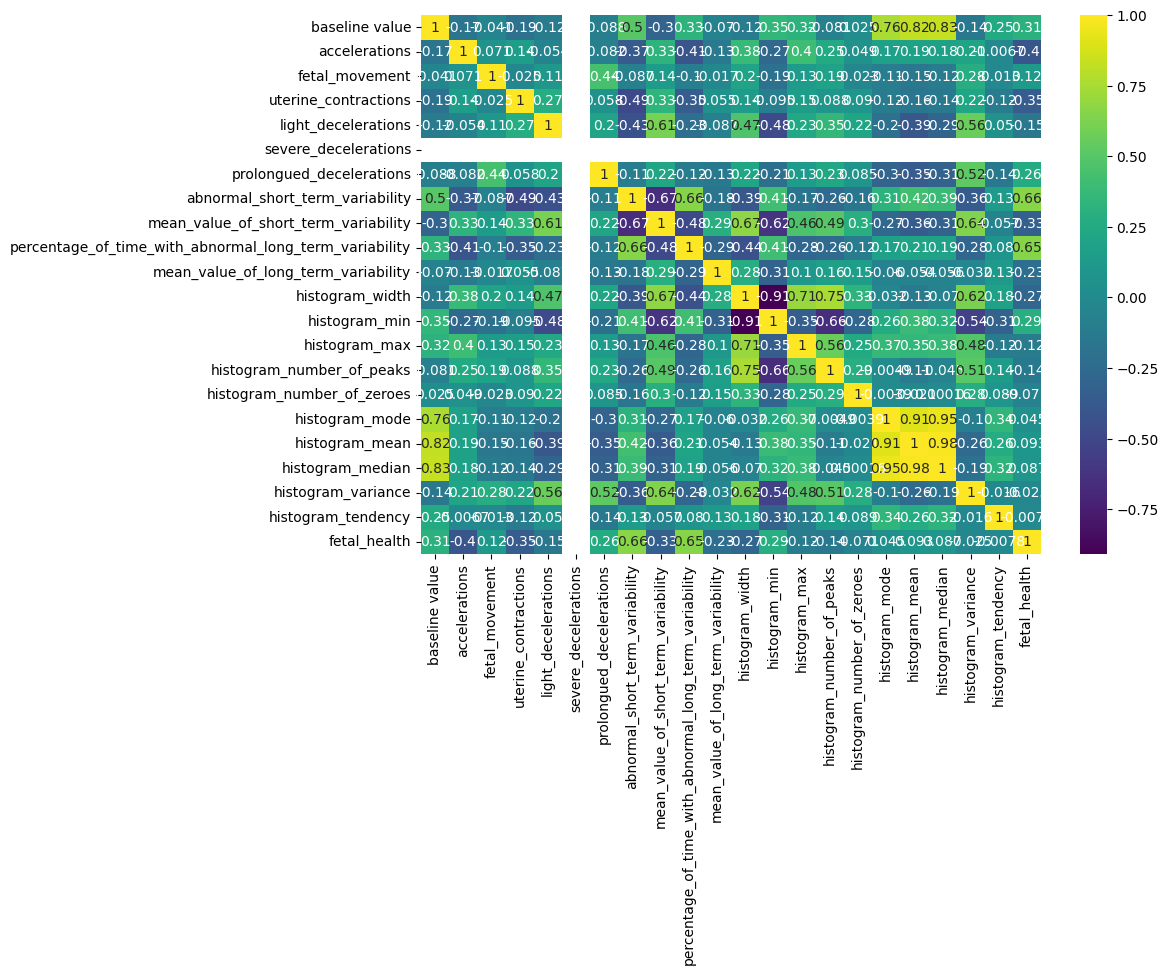

In [4]:
# Plot the heatmap fig
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

### Highly Correlated Features

From the heatmap, the following features seem to have a high correlation (close to 1):

- **`histogram_mean`** and **`histogram_median`**
- **`histogram_max`** and **`histogram_mean`**
- **`mean_value_of_long_term_variability`** and **`percentage_of_time_with_abnormal_long_term_variability`**
- **`histogram_mean`** and **`histogram_mode`**
- **`histogram_variance`** and **`histogram_width`**

These correlations indicate that these feature pairs might be providing similar information in the dataset.
- Since some of the features tend to have same information we have to drop some aato avoid redudancy for example: **histogram_mean**, **mean_value_of_long_termvariability**, and **histogram_variance**
- In addition the feature called **severe_deceleration** seem to not change and has a value 0. It means it would not contribute anything to the model there it has to be removed

In [5]:
# List of columns to drop
columns_to_drop = [
    'histogram_mean', 
    'mean_value_of_long_term_variability', 
    'histogram_variance', 
    'severe_decelerations'
]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Verify the columns have been dropped
print(df.columns)


Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_width', 'histogram_min', 'histogram_max',
       'histogram_number_of_peaks', 'histogram_number_of_zeroes',
       'histogram_mode', 'histogram_median', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


 ### **Separating the features from the target and sccaling the data**

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['fetal_health']) 
y = df['fetal_health']

# Initializung the StandardScaler, fitting and transforming the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())
print(X_scaled_df.shape)

from tensorflow.keras.utils import to_categorical

y = y - 1  # Converts [2, 1, 3] to [1, 0, 2]

trainX, testX, trainY, testY = train_test_split(X_scaled_df, y, test_size=0.2, random_state=101)

# Convert to one-hot encoding
num_classes = len(y.unique())  # Ensure num_classes matches the number of unique classes
trainY = to_categorical(trainY, num_classes=num_classes)
testY = to_categorical(testY, num_classes=num_classes)




   baseline value  accelerations  fetal_movement  uterine_contractions  \
0       -1.275733      -0.799893       -0.233556             -1.281127   
1       -0.117352       0.781436       -0.233556              0.837109   
2       -0.020821      -0.009228       -0.233556              1.543187   
3        0.075711      -0.009228       -0.233556              1.543187   
4       -0.117352       1.044991       -0.233556              1.543187   

   light_decelerations  prolongued_decelerations  \
0            -0.543514                 -0.211428   
1             0.676189                 -0.211428   
2             0.676189                 -0.211428   
3             0.676189                 -0.211428   
4            -0.543514                 -0.211428   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                         1.714077                             -0.830006   
1                        -1.477041                              0.925592   
2             

### **Training the model**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2

model = Sequential([
    Dense(128, activation="relu", input_shape=(trainX.shape[1],)),  # More units for feature learning
    BatchNormalization(),  
    Dropout(0.3),  #
    
    Dense(64, activation="relu", kernel_regularizer=l1_l2(0.01, 0.01)),  # Combine L1 and L2 regularization
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation="relu"),  # Deeper network to improve model capacity
    Dropout(0.2),

    Dense(3, activation="softmax")  s
])

# Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-6)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.00005),  
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

class_weights = {0: 1.0, 1: 2.5, 2: 3.0}  

# Model Summary
model.summary()

c:\Users\LENOVO\MediStat\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,507 (52.76 KB)

 Trainable params: 13,123 (51.26 KB)

 Non-trainable params: 384 (1.50 KB)

In [8]:
# Train the model
history = model.fit(
    trainX, trainY,
    validation_data=(testX, testY),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights,  # Handling imbalance
    verbose=1
)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2957 - loss: 10.4288 - val_accuracy: 0.3392 - val_loss: 9.1345 - learning_rate: 5.0000e-05
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3093 - loss: 10.2835 - val_accuracy: 0.3042 - val_loss: 9.1172 - learning_rate: 5.0000e-05
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3354 - loss: 10.1416 - val_accuracy: 0.3252 - val_loss: 9.0811 - learning_rate: 5.0000e-05
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3797 - loss: 9.8264 - val_accuracy: 0.3497 - val_loss: 9.0280 - learning_rate: 5.0000e-05
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4306 - loss: 9.6809 - val_accuracy: 0.3811 - val_loss: 8.9642 - learning_rate: 5.0000e-05
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4652 - loss: 9.5940 - val_accuracy: 0.4545 - val_loss: 8.8900 - learning_rate: 5.0000e-05
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5032 - l

### **Confusion matrix fro the trained model**

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


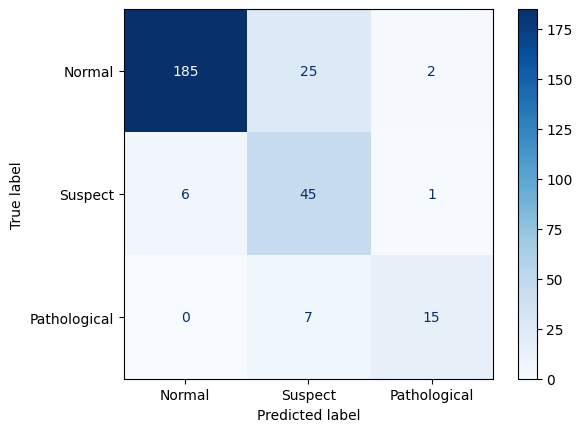

In [9]:
# Get predictions from the model
predictions = model.predict(testX)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels to class indices
true_classes = np.argmax(testY, axis=1)

# Create the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Suspect", "Pathological"])
disp.plot(cmap="Blues")

### **Save the model and the scaler**

In [10]:
# save the model
import pickle
pickle.dump(model, open("fetalhealth.pkl", "wb"))

In [11]:
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)


### Visualisations

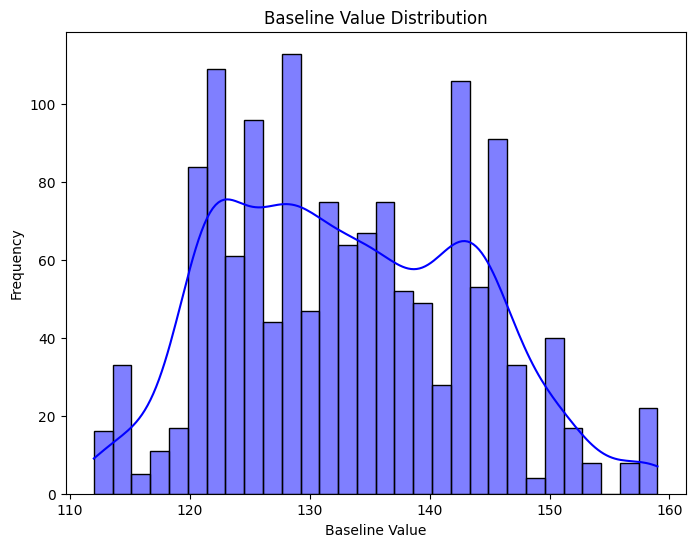

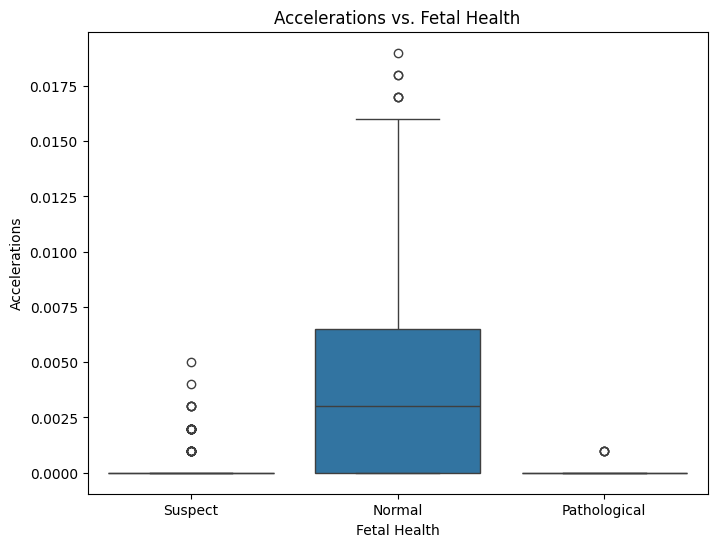

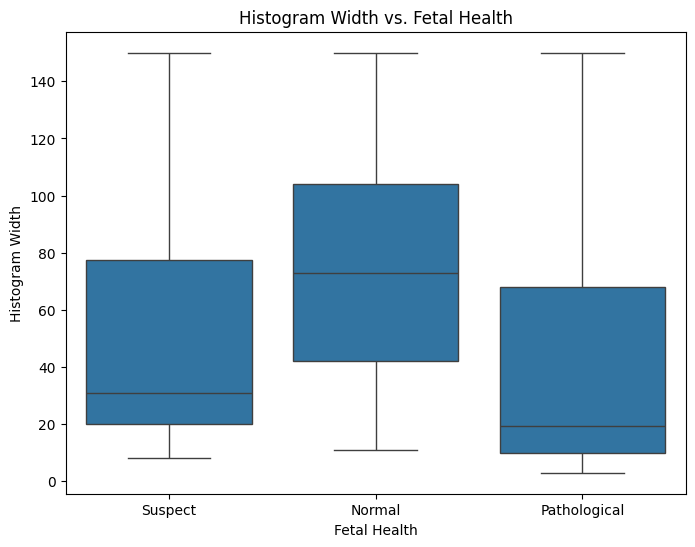

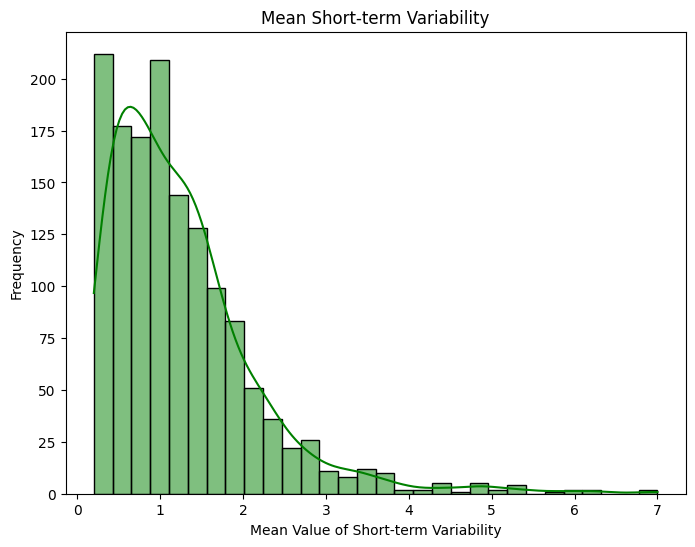

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25432\178607194.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fetal_health_counts.index, y=fetal_health_counts.values, palette='viridis')


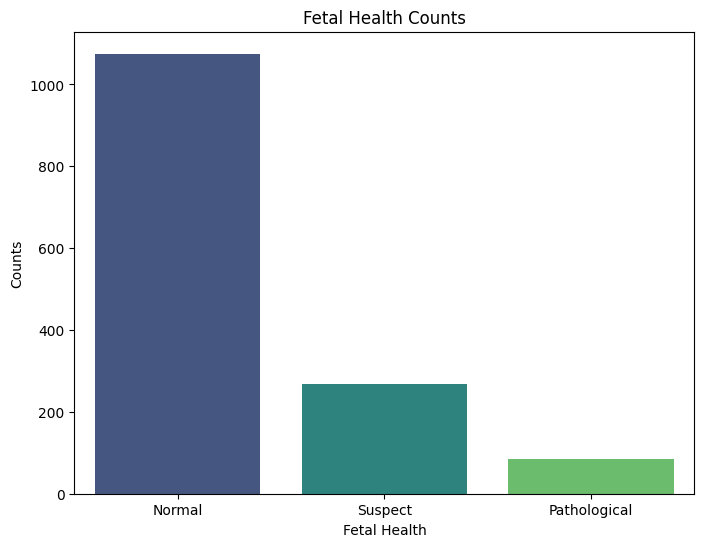

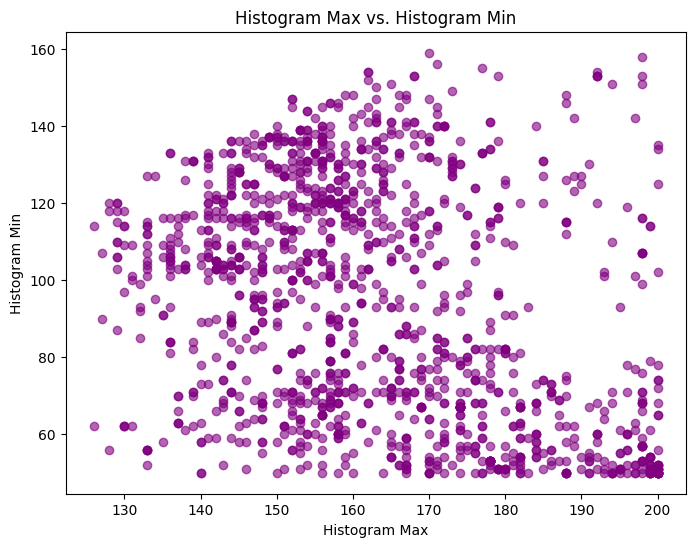

In [3]:
# Create a mapping for fetal health
fetal_health_mapping = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Replace the numeric values with their corresponding labels
visualdata['fetal_health'] = visualdata['fetal_health'].map(fetal_health_mapping)

# 1. Baseline Value Distribution
plt.figure(figsize=(8, 6))
sns.histplot(visualdata['baseline value'], kde=True, bins=30, color='blue')
plt.title('Baseline Value Distribution')
plt.xlabel('Baseline Value')
plt.ylabel('Frequency')
plt.show()

# 2. Accelerations vs. Fetal Health
plt.figure(figsize=(8, 6))
sns.boxplot(x='fetal_health', y='accelerations', data=visualdata)
plt.title('Accelerations vs. Fetal Health')
plt.xlabel('Fetal Health')
plt.ylabel('Accelerations')
plt.show()

# 3. Histogram Width vs. Fetal Health
plt.figure(figsize=(8, 6))
sns.boxplot(x='fetal_health', y='histogram_width', data=visualdata)
plt.title('Histogram Width vs. Fetal Health')
plt.xlabel('Fetal Health')
plt.ylabel('Histogram Width')
plt.show()

# 4. Mean Short-term Variability
plt.figure(figsize=(8, 6))
sns.histplot(visualdata['mean_value_of_short_term_variability'], kde=True, bins=30, color='green')
plt.title('Mean Short-term Variability')
plt.xlabel('Mean Value of Short-term Variability')
plt.ylabel('Frequency')
plt.show()

# 5. Fetal Health Counts
plt.figure(figsize=(8, 6))
fetal_health_counts = visualdata['fetal_health'].value_counts()
sns.barplot(x=fetal_health_counts.index, y=fetal_health_counts.values, palette='viridis')
plt.title('Fetal Health Counts')
plt.xlabel('Fetal Health')
plt.ylabel('Counts')
plt.show()

# 6. Histogram Max vs. Histogram Min
plt.figure(figsize=(8, 6))
plt.scatter(visualdata['histogram_max'], visualdata['histogram_min'], alpha=0.6, c='purple')
plt.title('Histogram Max vs. Histogram Min')
plt.xlabel('Histogram Max')
plt.ylabel('Histogram Min')
plt.show()
